<a id='决策树——原理'></a> 
# <font color=#0099ff face="微软雅黑">决策树——原理</font>  

顾名思义，决策树就是一棵树，一颗决策树由节点（node）和有向边（directed edge）组成。节点的类型有两种：内部节点和叶子节点。其中，内部节点表示一个特征或属性的测试条件（用于分开具有不同特性的记录），叶子节点表示一个分类。其模型是树形结构，其具体实现包括三种经典算法，分别为ID3，C4.5，CART。 

![决策树示例](https://img-blog.csdn.net/20170415164430749)

<a id='ID3：信息增益'></a> 
## <font color=#0099ff face="微软雅黑">ID3：信息增益</font>  

<a id='ID3原理'></a> 
### <font color=#0099ff face="微软雅黑">ID3原理</font>  

决策树的关键步骤是分裂属性，即按照一种特征属性的不同划分，构造不同分支。目标上让各个分裂自己尽可能地“纯”，即属于同一类别。那么如何来度量特征（features）的纯度，这时候就要用到“信息熵（information entropy）”。<br />
<font color=#FF0000 >信息熵</font>的定义：假如当前样本集D中第k类样本所占的比例为$p_k$，k=1,2,...K， K为类别的总数（对于二元分类来说，K=2）。则样本集的信息熵为：

$$Ent(D)=-\sum_{k=1}^Kp_k\log_{2}p_k$$

$Ent(D)$的值越小，则D的纯度越高。（这个公式也决定了信息增益的一个缺点：即信息增益对可取值数目多的特征有偏好，因为特征可取的值越多，会导致“纯度”越大，即$Ent(D)$会很小，如果一个特征的离散个数与样本数相等，那么$Ent(D)$值会为0）。

再来看一个概念<font color=#FF0000 >信息增益</font>（information gain），假定离散属性a有V个可能的取值，如果使用特征a来对数据集D进行划分，则会产生V个分支结点， 其中第v个结点包含了数据集D中所有在特征a上取值为$a^{v}$的样本总数，记为$D^{v}$。因此可以根据上面信息熵的公式计算出信息熵，再考虑到不同的分支结点所包含的样本数量不同，给分支节点赋予权重$ \frac{|D^{v}|}{|D|}$，即样本数越多的分支节点的影响越大，因此，能够计算出特征a对样本集D进行划分所获得的“信息增益”:
$$Gain(D,a)=Ent(D)-\sum_{v=1}^V \frac{|D^{v}|}{|D|}Ent(D^{v})$$


信息增益越大，则表示使用特征a对数据集划分所获得的“纯度提升”越大。所以信息增益可以用于决策树划分属性的选择，其实就是选择信息增益最大的属性，ID3算法就是采用的信息增益来划分属性。

![西瓜数据集](https://img-blog.csdn.net/20170415185921897)

显然该数据集包含17个样本，类别为二元的，即K=2。正例（类别为1的样本）占的比例为：$p_1=\frac{8}{17}$，反例（类别为0的样本）占的比例为：$p_2=\frac{9}{17}$。根据信息熵的公式能够计算出数据集D的信息熵为：

$$Ent(D)=-\sum_{k=1}^2 p_k\log_{2}p_k=-(\frac{8}{17}\log_{2}\frac{8}{17}+\frac{9}{17}\log_{2}\frac{9}{17} =0.998 $$

从数据集中能够看出特征集为：{色泽、根蒂、敲声、纹理、脐部、触感}。下面我们来计算每个特征的信息增益。先看“色泽”，它有三个可能的离值：{青绿、乌黑、浅白}，若使用“色泽”对数据集D进行划分，则可得到3个子集，分别为：$D^1$（色泽=青绿）、$D^2$（色泽=乌黑）、$D^3$（色泽=浅白）。

$D_1$共包含6个样本{1，4，6，10，13，17}，其中正例占$p_1=\frac{3}{6}$，反例占$p_1=\frac{3}{6}$。

$D_2$共包含6个样本{2，3，7，8，9，15}，其中正例占$p_1=\frac{4}{6}$，反例占$p_1=\frac{2}{6}$。

$D_3$共包含5个样本{5，11，12，14，16}，其中正例占$p_1=\frac{1}{5}$，反例占$p_1=\frac{4}{5}$。

因此，可以计算出用“色泽”划分之后所获得的3个分支结点的信息熵为：

$Ent(D_1)=-(\frac{3}{6}\log_{2}\frac{3}{6}+\frac{3}{6}\log_{2}\frac{3}{6} =1.000 $

$Ent(D_2)=-(\frac{4}{6}\log_{2}\frac{4}{6}+\frac{2}{6}\log_{2}\frac{2}{6} =0.918 $

$Ent(D_3)=-(\frac{1}{5}\log_{2}\frac{1}{5}+\frac{4}{5}\log_{2}\frac{4}{5} =0.722 $

因此，特征“色泽”的信息增益为：

\begin{equation}
\begin{split}
Gain(D,色泽)&=Ent(D)-\sum_{v=1}^3 \frac{|D^{v}|}{|D|}Ent(D^{v}) \\
         &=0.998-(\frac{6}{17}×1.000+\frac{6}{17}×0.918+\frac{5}{17}×0.722 \\
         &=0.109
\end{split}
\end{equation}

同理可以计算出其他特征的信息增益：

$Gain(D,根蒂)=0.143;\\
Gain(D,敲声)=0.141;\\
Gain(D,纹理)=0.381;\\
Gain(D,脐部)=0.289;\\
Gain(D,触感)=0.006;$

比较发现，特征“纹理”的信息增益最大，于是它被选为划分属性。因此可得：
![ID3-1](https://img-blog.csdnimg.cn/20190423165420378.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxOTk1NTc0,size_16,color_FFFFFF,t_70)


第二步、继续对上图中每个分支进行划分，以上图中第一个分支结点{“纹理=清晰”}为例，对这个结点进行划分，设该结点的样本集 {1，2，3，4，5，6，8，10，15}，共9个样本，可用特征集合为{色泽，根蒂，敲声，脐部，触感}，因此基于$D^1$ 能够计算出各个特征的信息增益：

$Gain(D_1,色泽)=0.043;\\
Gain(D_1,根蒂)=0.458;\\
Gain(D_1,敲声)=0.331;\\
Gain(D_1,脐部)=0.458;\\
Gain(D_1,触感)=0.458;$

比较发现，“根蒂”、“脐部”、“触感”这3个属性均取得了最大的信息增益，可以随机选择其中之一作为划分属性（不防选择“根蒂”）。因此可得：

![ID3-2](https://img-blog.csdnimg.cn/20190423165445134.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxOTk1NTc0,size_16,color_FFFFFF,t_70)

第三步,继续对上图中的每个分支结点递归的进行划分，以上图中的结点{“根蒂=蜷缩”}为例，设该结点的样本集为{1，2，3，4，5}，共5个样本，但这5个样本的class label均为“好瓜”，因此当前结点包含的样本全部属于同一类别无需划分，将当前结点标记为C类（在这个例子中为“好瓜”）叶节点，接下来对上图中结点{“根蒂=稍蜷”}进行划分，该点的样本集为 $D^1${6，8，15}，共有三个样本。可用特征集为{色泽，敲声，脐部，触感}，同样可以计算出各个特征的信息增益，得到

![ID3-3](https://img-blog.csdnimg.cn/20190423165723818.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxOTk1NTc0,size_16,color_FFFFFF,t_70)

第四步，继续用相同的方法在各个节点进行递归，最终，得到的决策树如下图所示：
![ID3-4](https://img-blog.csdnimg.cn/20190423170126596.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxOTk1NTc0,size_16,color_FFFFFF,t_70)


<a id='ID3代码实现'></a> 
### <font color=#0099ff face="微软雅黑">ID3代码实现</font>  

In [1]:
from numpy import *
import numpy as np
import pandas as pd
from math import log
import operator

In [2]:
df=pd.read_csv('D:/myprograms/titanic/treedata.txt',sep=',') 
df['编号']=df['编号'].astype(object)
df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,否


In [3]:
from numpy import *
import numpy as np
import pandas as pd
from math import log
import operator

#计算数据集的香农熵
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)
    labelCounts={}
    #给所有可能分类创建字典
    for featVec in dataSet:
        currentLabel=featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt=0.0
    #以2为底数计算香农熵
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

#对离散变量划分数据集，取出该特征取值为value的所有样本
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet
 
#对连续变量划分数据集，direction规定划分的方向，
#决定是划分出小于value的数据样本还是大于value的数据样本集
def splitContinuousDataSet(dataSet,axis,value,direction):
    retDataSet=[]
    for featVec in dataSet:
        if direction==0:
            if featVec[axis]>value:
                reducedFeatVec=featVec[:axis]
                reducedFeatVec.extend(featVec[axis+1:])
                retDataSet.append(reducedFeatVec)
        else:
            if featVec[axis]<=value:
                reducedFeatVec=featVec[:axis]
                reducedFeatVec.extend(featVec[axis+1:])
                retDataSet.append(reducedFeatVec)
    return retDataSet


#选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet,labels):
    numFeatures=len(dataSet[0])-1
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    bestSplitDict={}
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        #对连续型特征进行处理
        if type(featList[0]).__name__=='float' or type(featList[0]).__name__=='int':
            #产生n-1个候选划分点
            sortfeatList=sorted(featList)
            splitList=[]
            for j in range(len(sortfeatList)-1):
                splitList.append((sortfeatList[j]+sortfeatList[j+1])/2.0)
            
            bestSplitEntropy=10000
            slen=len(splitList)
            #求用第j个候选划分点划分时，得到的信息熵，并记录最佳划分点
            for j in range(slen):
                value=splitList[j]
                newEntropy=0.0
                subDataSet0=splitContinuousDataSet(dataSet,i,value,0)
                subDataSet1=splitContinuousDataSet(dataSet,i,value,1)
                prob0=len(subDataSet0)/float(len(dataSet))
                newEntropy+=prob0*calcShannonEnt(subDataSet0)
                prob1=len(subDataSet1)/float(len(dataSet))
                newEntropy+=prob1*calcShannonEnt(subDataSet1)
                if newEntropy<bestSplitEntropy:
                    bestSplitEntropy=newEntropy
                    bestSplit=j
            #用字典记录当前特征的最佳划分点
            bestSplitDict[labels[i]]=splitList[bestSplit]
            infoGain=baseEntropy-bestSplitEntropy
        #对离散型特征进行处理
        else:
            uniqueVals=set(featList)
            newEntropy=0.0
            #计算该特征下每种划分的信息熵
            for value in uniqueVals:
                subDataSet=splitDataSet(dataSet,i,value)
                prob=len(subDataSet)/float(len(dataSet))
                newEntropy+=prob*calcShannonEnt(subDataSet)
            infoGain=baseEntropy-newEntropy
        if infoGain>bestInfoGain:
            bestInfoGain=infoGain
            bestFeature=i
    #若当前节点的最佳划分特征为连续特征，则将其以之前记录的划分点为界进行二值化处理
    #即是否小于等于bestSplitValue
    if type(dataSet[0][bestFeature]).__name__=='float' or type(dataSet[0][bestFeature]).__name__=='int':      
        bestSplitValue=bestSplitDict[labels[bestFeature]]        
        labels[bestFeature]=labels[bestFeature]+'<='+str(bestSplitValue)
        for i in range(shape(dataSet)[0]):
            if dataSet[i][bestFeature]<=bestSplitValue:
                dataSet[i][bestFeature]=1
            else:
                dataSet[i][bestFeature]=0
    return bestFeature



def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    return max(classCount)

#主程序，递归产生决策树
def createTree(dataSet,labels,data_full,labels_full):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet,labels)
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    if type(dataSet[0][bestFeat]).__name__=='str':
        currentlabel=labels_full.index(labels[bestFeat])
        featValuesFull=[example[currentlabel] for example in data_full]
        uniqueValsFull=set(featValuesFull)
    del(labels[bestFeat])
    #针对bestFeat的每个取值，划分出一个子树。
    for value in uniqueVals:
        subLabels=labels[:]
        if type(dataSet[0][bestFeat]).__name__=='str':
            uniqueValsFull.remove(value)
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels,data_full,labels_full)
    if type(dataSet[0][bestFeat]).__name__=='str':
        for value in uniqueValsFull:
            myTree[bestFeatLabel][value]=majorityCnt(classList)
    return myTree


In [4]:
"""
@author: 蔚蓝的天空Tom
Aim:得到决策树的字典后，需要使用python来绘制对应的决策树figure
输入决策树的字典，样例如下所示：
dtree = {'house?': {'hourse_no': {'working?': {'work_no': 'refuse', 'work_yes': 'agree'}}, 'hourse_yes': 'agree'}}
"""

 
#定义判断结点形状,其中boxstyle表示文本框类型,fc指的是注释框颜色的深度
decisionNode = dict(boxstyle="round4", color='r', fc='0.9')
#定义叶结点形状
leafNode = dict(boxstyle="circle", color='m')
#定义父节点指向子节点或叶子的箭头形状
arrow_args = dict(arrowstyle="<-", color='g')
 
def plot_node(node_txt, center_point, parent_point, node_style):
    '''
    绘制父子节点，节点间的箭头，并填充箭头中间上的文本
    :param node_txt:文本内容
    :param center_point:文本中心点
    :param parent_point:指向文本中心的点
    '''
    createPlot.ax1.annotate(node_txt, 
                            xy=parent_point,
                            xycoords='axes fraction',
                            xytext=center_point,
                            textcoords='axes fraction',
                            va="center",
                            ha="center",
                            bbox=node_style,
                            arrowprops=arrow_args,
                            fontsize=15)


def get_leafs_num(tree_dict):
    '''
    获取叶节点的个数
    :param tree_dict:树的数据字典
    :return tree_dict的叶节点总个数
    '''
    #tree_dict的叶节点总数
    leafs_num = 0
    
    #字典的第一个键，也就是树的第一个节点
    root = list(tree_dict.keys())[0]
    #这个键所对应的值，即该节点的所有子树。
    child_tree_dict =tree_dict[root]
    for key in child_tree_dict.keys():
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__=='dict':
            #子树是字典型，则当前树的叶节点数加上此子树的叶节点数
            leafs_num += get_leafs_num(child_tree_dict[key])
        else:
            #子树不是字典型，则当前树的叶节点数加1
            leafs_num += 1
 
    #返回tree_dict的叶节点总数
    return leafs_num
 
def get_tree_max_depth(tree_dict):
    '''
    求树的最深层数
    :param tree_dict:树的字典存储
    :return tree_dict的最深层数
    '''
    #tree_dict的最深层数
    max_depth = 0
    
    #树的根节点
    root = list(tree_dict.keys())[0]
    #当前树的所有子树的字典
    child_tree_dict = tree_dict[root]
    
    for key in child_tree_dict.keys():
        #树的当前分支的层数
        this_path_depth = 0
        #检测子树是否字典型
        if type(child_tree_dict[key]).__name__ == 'dict':
            #如果子树是字典型，则当前分支的层数需要加上子树的最深层数
            this_path_depth = 1 + get_tree_max_depth(child_tree_dict[key])
        else:
            #如果子树不是字典型，则是叶节点，则当前分支的层数为1
            this_path_depth = 1
        if this_path_depth > max_depth:
            max_depth = this_path_depth
    
    #返回tree_dict的最深层数
    return max_depth
 
def plot_mid_text(center_point, parent_point, txt_str):
    '''
    计算父节点和子节点的中间位置，并在父子节点间填充文本信息
    :param center_point:文本中心点
    :param parent_point:指向文本中心点的点
    '''
    
    x_mid = (parent_point[0] - center_point[0])/2.0 + center_point[0]
    y_mid = (parent_point[1] - center_point[1])/2.0 + center_point[1]
    createPlot.ax1.text(x_mid, y_mid, txt_str, fontsize=15)
    return
 
def plotTree(tree_dict, parent_point, node_txt):
    '''
    绘制树
    :param tree_dict:树
    :param parent_point:父节点位置
    :param node_txt:节点内容
    '''
    
    leafs_num = get_leafs_num(tree_dict)
    root = list(tree_dict.keys())[0]
    #plotTree.totalW表示树的深度
    center_point = (plotTree.xOff+(1.0+float(leafs_num))/2.0/plotTree.totalW,plotTree.yOff)
    #填充node_txt内容
    plot_mid_text(center_point, parent_point, node_txt)
    #绘制箭头上的内容
    plot_node(root, center_point, parent_point, decisionNode)
    #子树
    child_tree_dict = tree_dict[root]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    #因从上往下画，所以需要依次递减y的坐标值，plotTree.totalD表示存储树的深度
    for key in child_tree_dict.keys():
        if type(child_tree_dict[key]).__name__ == 'dict':
            plotTree(child_tree_dict[key],center_point,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plot_node(child_tree_dict[key],(plotTree.xOff,plotTree.yOff),center_point,leafNode)
            plot_mid_text((plotTree.xOff,plotTree.yOff),center_point,str(key))
    #h绘制完所有子节点后，增加全局变量Y的偏移
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD
 
    return
 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
def createPlot(tree_dict):
    '''
    绘制决策树图形
    :param tree_dict
    :return 无
    '''
    #设置绘图区域的背景色
    fig=plt.figure(1,facecolor='white',figsize=(9, 9))
    #清空绘图区域
    fig.clf()
    #定义横纵坐标轴,注意不要设置xticks和yticks的值!!!
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1=plt.subplot(111, frameon=False, **axprops)
    #由全局变量createPlot.ax1定义一个绘图区，111表示一行一列的第一个，frameon表示边框,**axprops不显示刻度
    plotTree.totalW=float(get_leafs_num(tree_dict))
    plotTree.totalD=float(get_tree_max_depth(tree_dict))
    plotTree.xOff=-0.5/plotTree.totalW;
    plotTree.yOff=1.0;
    plotTree(tree_dict, (0.5,1.0), '')
    plt.show()
    


In [5]:
data=df.values[:,1:].tolist()
data_full=data[:]
labels=df.columns.values[1:-1].tolist()
labels_full=labels[:]

myTree=createTree(data,labels,data_full,labels_full)

In [6]:
myTree

{'纹理': {'模糊': '否',
  '稍糊': {'触感': {'软粘': '是', '硬滑': '否'}},
  '清晰': {'根蒂': {'蜷缩': '是',
    '稍蜷': {'色泽': {'乌黑': {'触感': {'软粘': '否', '硬滑': '是'}}, '青绿': '是', '浅白': '是'}},
    '硬挺': '否'}}}}

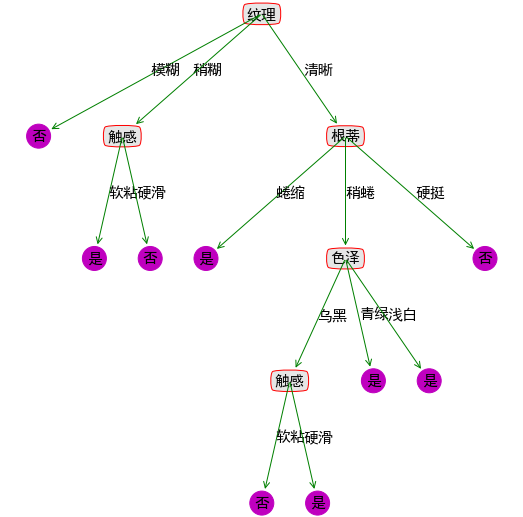

In [7]:
createPlot(myTree)

但信息增益有个缺点就是对可取数值多的属性有偏好，举个例子讲，还是考虑西瓜数据集，如果我们把“编号”这一列当做属性也考虑在内，那么可以计算出它的条件熵为0，信息增益为0.998，远远大于其他的候选属性，因为“编号”有17个可取的数值，产生17个分支，每个分支结点仅包含一个样本，显然这些分支结点的纯度最大。但是，这样的决策树不具有任何泛化能力。还是拿西瓜数据集2.0来测试下，如果考虑编号这一属性，看看ID3算法会生成一颗什么样的决策树：

In [8]:
data=df.values.astype('str').tolist()
data_full=data[:]
labels=df.columns.values[0:-1].tolist()
labels_full=labels[:]
myTree=createTree(data,labels,data_full,labels_full)

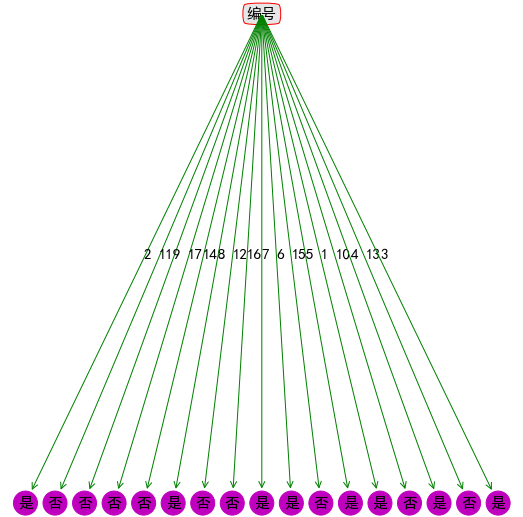

In [9]:
createPlot(myTree)

<a id='C4.5：信息增益率'></a> 
## <font color=#0099ff face="微软雅黑">C4.5：信息增益率</font>  

<a id='C4.5原理'></a> 
### <font color=#0099ff face="微软雅黑">C4.5原理</font>  

由于ID3算法的缺点，后来又提出了对ID3算法的改进C4.5算法，C4.5使用了信息增益率来构造决策树，此外C4.5为了避免过拟合，还提供了剪枝的功能，还能够处理连续值与缺失值。<br />
<font color=#FF0000 >信息增益率</font>的定义为：
$$Gain\_ratio(D,a)=\frac {Gain(D,a)}{IV(a)}$$

其中：
$$IV(a)=-\sum_{v=1}^V \frac{|D^{v}|}{|D|}\log_{2} \frac{|D^{v}|}{|D|}$$

属性a的可能取值数目越多（即V越大），IV(a)的值通常也会越大，信息增益率相当于在信息增益基础上加了一个惩罚参数。<br />

例如西瓜数据集中，对于那些取值数目多的属性（如编号），IV(a)的值达到4.088：<br />

$IV(触感）=-(\frac{12}{17}\log_{2}\frac{12}{17}+\frac{5}{17}\log_{2}\frac{5}{17})=0.874（V=2）$

$IV(色泽)=-(\frac{6}{17}\log_{2}\frac{6}{17}+\frac{5}{17}\log_{2}\frac{5}{17}+\frac{5}{17}\log_{2}\frac{6}{17})=1.580（V=3）$

$IV(编号)=-17×(\frac{1}{17}\log_{2}\frac{1}{17})=4.088（V=17）$


但增益率也可能产生一个问题就是，对可取数值数目较少的属性有所偏好。<br />
因此，C4.5算法并不是直接选择使用增益率最大的候选划分属性，而是使用了一个启发式算法：先从候选划分属性中找出信息增益高于平均水平的属性，再从中选择信息增益率最高的。

还是以西瓜数据集举例，

$Gain(D,色泽)=0.109;\\
Gain(D,根蒂)=0.143;\\
Gain(D,敲声)=0.141;\\
Gain(D,纹理)=0.381;\\
Gain(D,脐部)=0.289;\\
Gain(D,触感)=0.006;$

$avg\_Gain(D)=\frac{0.109+0.143+0.141+0.381+0.289+0.006}{6}=0.178$

选择信息增益高于平均水平的特征，即选择“纹理”和“脐部”计算信息增益率：<br />
★特征“纹理”：清晰：9；稍糊：5；模糊：3

$IV(纹理)=-(\frac{9}{17}\log_{2}\frac{9}{17}+\frac{5}{17}\log_{2}\frac{5}{17}+\frac{3}{17}\log_{2}\frac{3}{17})=1.446$
$Gain\_ratio(D,纹理)=\frac{0.381}{1.446}=0.263$

★特征“脐部”：凹陷：7；稍凹：6；平坦：4

$IV(脐部)=-(\frac{7}{17}\log_{2}\frac{7}{17}+\frac{6}{17}\log_{2}\frac{6}{17}+\frac{4}{17}\log_{2}\frac{4}{17})=1.548$
$Gain\_ratio(D,脐部)=\frac{0.289}{1.548}=0.187$


“纹理”的信息增益率大于“脐部”的信息增益率，所以选择特征“纹理”当作节点，划分数据集。
![C4.5-1](https://img-blog.csdnimg.cn/20190423170231334.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxOTk1NTc0,size_16,color_FFFFFF,t_70)

继续用类似的方法递归下去，可以得到最后的决策树。

<a id='C4.5代码实现'></a> 
### <font color=#0099ff face="微软雅黑">C4.5代码实现</font>  

In [10]:
from numpy import *
from scipy import *
from math import log
import operator

#计算给定数据的香浓熵：
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)  
    labelCounts = {}  #类别字典（类别的名称为键，该类别的个数为值）
    for featVec in dataSet:
        currentLabel = featVec[-1]  
        if currentLabel not in labelCounts.keys():  #还没添加到字典里的类型
            labelCounts[currentLabel] = 0;
        labelCounts[currentLabel] += 1;
    shannonEnt = 0.0  
    for key in labelCounts:  #求出每种类型的熵
        prob = float(labelCounts[key])/numEntries  #每种类型个数占所有的比值
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt;  #返回熵

#按照给定的特征划分数据集
def splitDataSet(dataSet, axis, value):
    retDataSet = []  
    for featVec in dataSet:  #按dataSet矩阵中的第axis列的值等于value的分数据集
        if featVec[axis] == value:      #值等于value的，每一行为新的列表（去除第axis个数据）
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])  
            retDataSet.append(reducedFeatVec) 
    return retDataSet  #返回分类后的新矩阵

#选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):  
    numFeatures = len(dataSet[0])-1  #求属性的个数
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1  
    for i in range(numFeatures):  #求所有属性的信息增益
        featList = [example[i] for example in dataSet]  
        uniqueVals = set(featList)  #第i列属性的取值（不同值）数集合
        newEntropy = 0.0  
        splitInfo = 0.0;
        for value in uniqueVals:  #求第i列属性每个不同值的熵*他们的概率
            subDataSet = splitDataSet(dataSet, i , value)  
            prob = len(subDataSet)/float(len(dataSet))  #求出该值在i列属性中的概率
            newEntropy += prob * calcShannonEnt(subDataSet)  #求i列属性各值对于的熵求和
            splitInfo -= prob * log(prob, 2);
        infoGain = (baseEntropy - newEntropy) / splitInfo;  #求出第i列属性的信息增益率
        if(infoGain > bestInfoGain):  #保存信息增益率最大的信息增益率值以及所在的下表（列值i）
            bestInfoGain = infoGain  
            bestFeature = i  
    return bestFeature  

#找出出现次数最多的分类名称
def majorityCnt(classList):  
    classCount = {}  
    for vote in classList:  
        if vote not in classCount.keys(): classCount[vote] = 0  
        classCount[vote] += 1  
    sortedClassCount = sorted(classCount.iteritems(), key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]  

#创建树
def createTree(dataSet, labels):  
    classList = [example[-1] for example in dataSet];    #创建需要创建树的训练数据的结果列表（例如最外层的列表是[N, N, Y, Y, Y, N, Y]）
    if classList.count(classList[0]) == len(classList):  #如果所有的训练数据都是属于一个类别，则返回该类别
        return classList[0];  
    if (len(dataSet[0]) == 1):  #训练数据只给出类别数据（没给任何属性值数据），返回出现次数最多的分类名称
        return majorityCnt(classList);

    bestFeat = chooseBestFeatureToSplit(dataSet);   #选择信息增益最大的属性进行分（返回值是属性类型列表的下标）
    bestFeatLabel = labels[bestFeat]  #根据下表找属性名称当树的根节点
    myTree = {bestFeatLabel:{}}  #以bestFeatLabel为根节点建一个空树
    del(labels[bestFeat])  #从属性列表中删掉已经被选出来当根节点的属性
    featValues = [example[bestFeat] for example in dataSet]  #找出该属性所有训练数据的值（创建列表）
    uniqueVals = set(featValues)  #求出该属性的所有值得集合（集合的元素不能重复）
    for value in uniqueVals:  #根据该属性的值求树的各个分支
        subLabels = labels[:]  
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)  #根据各个分支递归创建树
    return myTree  #生成的树

#实用决策树进行分类
def classify(inputTree, featLabels, testVec):  
    firstStr = inputTree.keys()[0]  
    secondDict = inputTree[firstStr]  
    featIndex = featLabels.index(firstStr)  
    for key in secondDict.keys():  
        if testVec[featIndex] == key:  
            if type(secondDict[key]).__name__ == 'dict':  
                classLabel = classify(secondDict[key], featLabels, testVec)  
            else: classLabel = secondDict[key]  
    return classLabel  

#myDat, labels = createTrainData()  
#myTree = createTree(myDat,labels) 
#print myTree
#bootList = ['outlook','temperature', 'humidity', 'windy'];
#testList = createTestData();
#for testData in testList:
#    dic = classify(myTree, bootList, testData)
#    print dic

In [11]:
data=df.values[:,1:].tolist()
data_full=data[:]
labels=df.columns.values[1:-1].tolist()
labels_full=labels[:]

myTree=createTree(data_full,labels_full)

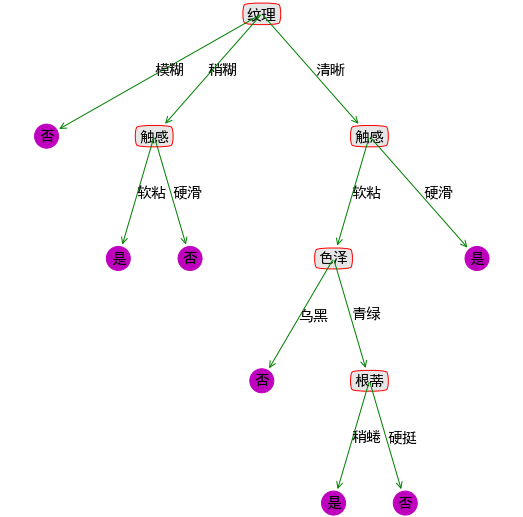

In [12]:
createPlot(myTree)

<a id='CART：基尼指数'></a> 
## <font color=#0099ff face="微软雅黑">CART：基尼指数</font>  

<a id='CART原理'></a> 
### <font color=#0099ff face="微软雅黑">CART原理</font>  

<font color=#FF0000 >基尼指数</font>（Gini index）也可以用于选择划分特征，像CART（classification and regression tree）决策树（分类和回归都可以用）就是使用基尼指数来选择划分特征。基尼值可表示为：
$$Gini(D)=\sum_{k=1}^K \sum_{k^{'} \not=k}p_k p_{k^{'}}=1-\sum_{k=1}^K p_k^{2}$$
$Gini(D)$反应了从数据集D中随机抽取两个样本，其类别标记不一致的概率，因此，$Gini(D)$越小，则数据集D的纯度越高。

如果样本集合D根据特征a是否取某一可能值被分割为两部分，则在特征a条件下，集合D的基尼指数：

$$Gini(D,a)=\sum_{v=1}^V \frac{|D^{v}|}{|D|}Gini(D^{v})$$

所以在候选属性集合中，选择那个使得划分后基尼指数最小的属性作为最优划分属性。


还是以西瓜数据集举例：<br />
根节点包含D中所有数据，数据总数为17，可用特征{色泽，根蒂，敲声，纹理，脐部，触感}：

★特征“色泽”：<br />
青绿：{1，4，6，10，13，17}，数据总计：6，正例p1= 3/6，反例p2= 3/6 <br />
$Gini(青绿)=1-\sum_{v=1}^Vp_k^{2}=1-(\frac{3}{6}×\frac{3}{6}+\frac{3}{6}×\frac{3}{6}）=0.5$

乌黑：{2，3，7，8，9，15}，数据总计：6，正例p1= 4/6，反例p2= 2/6 <br />
$Gini(乌黑)=1-\sum_{v=1}^Vp_k^{2}=1-(\frac{4}{6}×\frac{4}{6}+\frac{2}{6}×\frac{2}{6}）=0.444$

浅白：{5，11，12，14，16}，数据总计：5，正例p1= 1/5，反例p2= 4/5 <br />
$Gini(浅白)=1-\sum_{v=1}^Vp_k^{2}=1-(\frac{1}{5}×\frac{1}{5}+\frac{4}{5}×\frac{4}{5}）=0.32$

“色泽”特征的基尼指数为：<br />
$Gini(D,色泽)=\frac{6}{17}×0.5 +\frac{6}{17}×0.444 +\frac{5}{17}×0.32 =0.427$

同理可以计算出其他特征的基尼指数为：

$Gini(D,根蒂) = 0.422	\\
Gini(D,敲声) = 0.424 \\
Gini(D,纹理) = 0.277 \\
Gini(D,脐部) = 0.345 \\
Gini(D,触感) = 0.494$

选择基尼指数最小的特征进行划分，所以此次划分使用“纹理”特征。
![CART-1](https://img-blog.csdnimg.cn/20190423170457388.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxOTk1NTc0,size_16,color_FFFFFF,t_70)

接下来的过程是类似的，继续在各个节点上计算基尼指数，最后得到的决策树如下：
![CART-2](https://img-blog.csdnimg.cn/20190423170750848.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxOTk1NTc0,size_16,color_FFFFFF,t_70)

<a id='CART代码实现'></a> 
### <font color=#0099ff face="微软雅黑">CART代码实现</font>  

sklearn中的决策树算法生成的是二叉树，且做了一些优化，结果和上面会有不同。但都是用了基尼指数这一指标来划分数据集。

In [16]:
from sklearn.preprocessing import LabelEncoder
le_色泽=LabelEncoder().fit(df['色泽'])  
色泽_label=le_色泽.transform(df['色泽'])


le_根蒂=LabelEncoder().fit(df['根蒂'])  
根蒂_label=le_根蒂.transform(df['根蒂'])

le_敲声=LabelEncoder().fit(df['敲声'])  
敲声_label=le_敲声.transform(df['敲声'])

le_纹理=LabelEncoder().fit(df['纹理'])  
纹理_label=le_纹理.transform(df['纹理'])

le_脐部=LabelEncoder().fit(df['脐部'])  
脐部_label=le_脐部.transform(df['脐部'])

le_触感=LabelEncoder().fit(df['触感'])  
触感_label=le_触感.transform(df['触感'])

le_好瓜=LabelEncoder().fit(df['好瓜'])  
好瓜_label=le_好瓜.transform(df['好瓜'])

df['色泽_label'] =色泽_label
df['根蒂_label'] =根蒂_label
df['敲声_label'] =敲声_label
df['纹理_label'] =纹理_label
df['脐部_label'] =脐部_label
df['触感_label'] =触感_label
df['好瓜_label'] =好瓜_label


In [44]:
X=df.iloc[:,8:-1]
Y=df['好瓜_label']

X_label=df.columns[1:7]
Y_label=['坏瓜','好瓜']

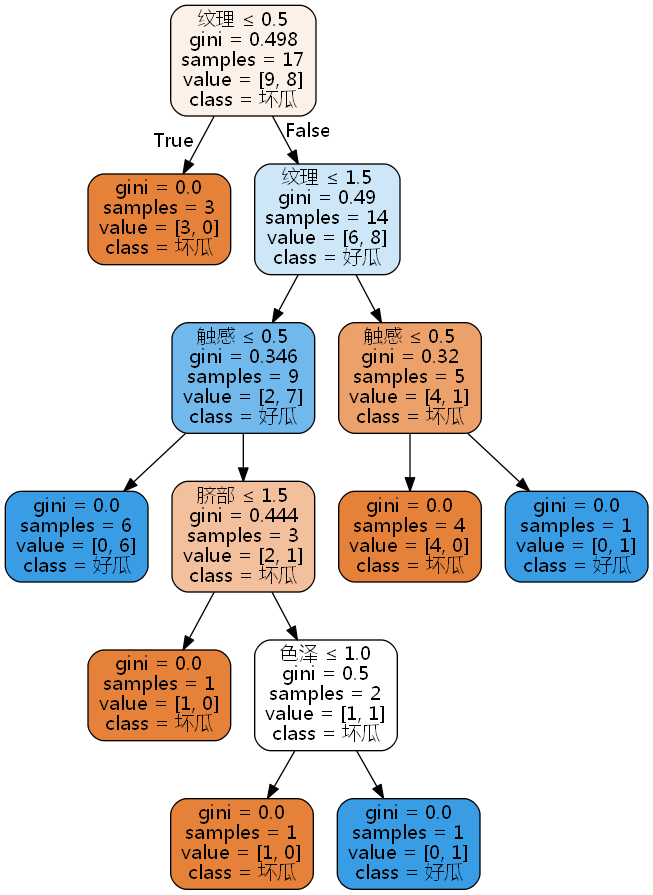

In [45]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
import os

os.environ["PATH"] += os.pathsep + 'D:/software/Graphviz/bin/'

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=X_label,
                     class_names=Y_label,
                     filled=True, rounded=True,
                     special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('helvetica','"Microsoft YaHei"'))

Image(graph.create_png())

<a id='三种算法的对比'></a> 
## <font color=#0099ff face="微软雅黑">三种算法的对比</font>  

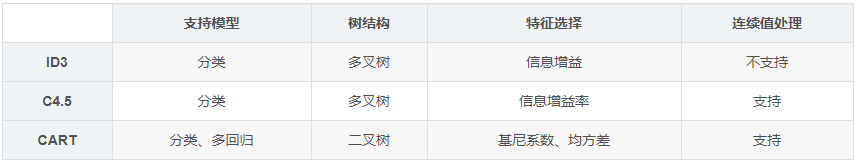

连续型特征的处理：

C4.5：先从小到大升序排列，计算相邻两个数值的平均数，再用这个平均数作为划分点，计算信息增益，最后选信息增益最大的作为树的分支。

CART：依次用该特征的数值把样本分成两份，分别计算两边的均值和方差，最后选择两边方差相加最小的那个划分点作为树的分支。

![连续型特征](https://img-blog.csdnimg.cn/20190413193835661.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xBNDAxMDg4MjQy,size_16,color_FFFFFF,t_70)

1. 根据第1个属性值划分为<=125和>125两部分： <br />
<=125的有：125, 100, 70, 120, 95, 60, 85, 75, 90，均值为91.111 <br />
\>125的有：220， 均值为220 <br />
$σ(S1) = 61.554 \\
σ(S2) = 0 \\
Gain\_σ(S) = σ(S1) + σ(S2) = 61.554$


2. 根据第2个属性值划分为<=100和>100两部分： <br />
<=100的有：100, 70, 95, 60, 85, 75, 90，均值为82.143 <br />
\>100的有：125,120,220，均值为155 <br />
$σ(S1) = 35.254 \\
σ(S2) = 79.687 \\
Gain\_σ(S) = σ(S1) + σ(S2) = 114.941$


3. 根据第3个属性值划分为<=70和>70两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =129.085$

 

4. 根据第4个属性值划分为<=120和>120两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =117.144$

 

5. 根据第5个属性值划分为<=95和>95两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =122.347$

 

6. 根据第6个属性值划分为<=60和>60两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =128.798$

 

7. 根据第7个属性值划分为<=220和>220两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =136.894$

 

8. 根据第8个属性值划分为<=85和>85两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =126.656$

 

9. 根据第9个属性值划分为<=75和>75两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =125.568$

 

10. 根据第10个属性值划分为<=90和>90两部分： <br />
$Gain\_σ(S) = σ(S1) + σ(S2) =125.511$

通过计算 $Gain\_σ$ 可知最优二分点为第一种情况，即125。于是年收入可以分为大于125和小于125，然后按照之前类似的方法求基尼指数。

![连续型特征](https://img-blog.csdnimg.cn/20190413201058608.png)

<a id='随机森林——原理'></a> 
# <font color=#0099ff face="微软雅黑">随机森林——原理</font>  

随机森林实际上是一种特殊的bagging方法，它将决策树用作bagging中的模型。首先，用bootstrap方法生成m个训练集，然后，对于每个训练集，构造一颗决策树，在节点找特征进行分裂的时候，并不是对所有特征找到能使得指标（如信息增益）最大的，而是在特征中随机抽取一部分特征，在抽到的特征中间找到最优解，应用于节点，进行分裂。随机森林的方法由于有了bagging，也就是集成的思想在，实际上相当于对于样本和特征都进行了采样（如果把训练数据看成矩阵，就像实际中常见的那样，那么就是一个行和列都进行采样的过程），所以可以避免过拟合。